# **GLOBAL AI HUB**
### **Project 2: Transfer Learning**

In [22]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [24]:
%cd '/gdrive/My Drive/Global_AI_Hub'

/gdrive/My Drive/Global_AI_Hub


### Import Modules

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import random
import PIL
import cv2

#### We normalize and resize the images

In [26]:
# one (1) for dogs and zero (0) for cats
input_img = []
label = []
for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        pth = os.path.join("PetImages", class_name, path)
        img=cv2.imread(pth)
        # Normalize
        image_norm = cv2.normalize(img, None, alpha=0,beta=200, norm_type=cv2.NORM_MINMAX)
        try: 
          # 48x48 yapılmasının nedeni VGG19 modelinin kullanılacak olmasıdır
          img = cv2.resize(image_norm, (48, 48))
          input_img.append(img)
          if class_name == 'Cat':
            label.append(0)
          else:
            label.append(1)
        except:
          #print('error')
          continue
print(input_img[0], label[0])

[[[ 52  72  59]
  [ 56  76  63]
  [ 53  66  65]
  ...
  [ 51  56 101]
  [ 44  59  69]
  [ 28  40  54]]

 [[ 78  94 122]
  [ 64  80 108]
  [ 53  64  81]
  ...
  [ 59  69  84]
  [ 49  62  66]
  [ 48  66  62]]

 [[ 51  59 101]
  [ 66  72 120]
  [ 54  64 110]
  ...
  [ 37  52  55]
  [ 41  56  56]
  [ 43  57  51]]

 ...

 [[ 57  68  63]
  [ 58  76  64]
  [ 36  50  56]
  ...
  [ 43  62  57]
  [ 44  62  63]
  [ 22  40  87]]

 [[ 65  73  71]
  [ 32  45  42]
  [ 51  59  96]
  ...
  [ 55  77  74]
  [ 54  66 114]
  [ 48  62 120]]

 [[ 51  66 101]
  [ 63  77  75]
  [ 34  44  48]
  ...
  [ 49  59  75]
  [ 90  99 125]
  [ 52  80 149]]] 1


In [27]:
# We create a list that is [image, label] format, and then add each image to that list together with their labels.
data = []
l = len(input_img)
print(l)
for i in range(l):
  data.append([input_img[i], label[i]])
print(len(data))

24965
24965


In [29]:
# Sadece görselleştirme için dataframe oluşturulmuştur.
df = pd.DataFrame()
df['images'] = input_img
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,"[[[68, 90, 114], [22, 28, 33], [48, 64, 87], [...",0
1,"[[[82, 79, 78], [87, 84, 83], [85, 83, 82], [8...",0
2,"[[[61, 61, 61], [64, 64, 64], [64, 64, 64], [7...",0
3,"[[[122, 49, 182], [104, 38, 166], [91, 39, 170...",1
4,"[[[198, 184, 163], [197, 180, 160], [199, 199,...",0


In [30]:
# (24965,) görsel sayısıdır, (48, 48, 3) ise 48x48 shapeinde ve rgb channelda olduğunu ifade etmektedir.
df['images'].shape, df['images'][0].shape

((24965,), (48, 48, 3))

### Exploratory Data Analysis

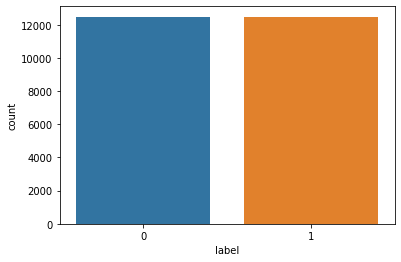

In [31]:
# Since the amount of both inputs is much the same, we can make predictions well. So we can use Accuracy metric.
sns.countplot(df['label'])

In [32]:
data[0], data[0][1]

([array([[[ 52,  72,  59],
          [ 56,  76,  63],
          [ 53,  66,  65],
          ...,
          [ 51,  56, 101],
          [ 44,  59,  69],
          [ 28,  40,  54]],
  
         [[ 78,  94, 122],
          [ 64,  80, 108],
          [ 53,  64,  81],
          ...,
          [ 59,  69,  84],
          [ 49,  62,  66],
          [ 48,  66,  62]],
  
         [[ 51,  59, 101],
          [ 66,  72, 120],
          [ 54,  64, 110],
          ...,
          [ 37,  52,  55],
          [ 41,  56,  56],
          [ 43,  57,  51]],
  
         ...,
  
         [[ 57,  68,  63],
          [ 58,  76,  64],
          [ 36,  50,  56],
          ...,
          [ 43,  62,  57],
          [ 44,  62,  63],
          [ 22,  40,  87]],
  
         [[ 65,  73,  71],
          [ 32,  45,  42],
          [ 51,  59,  96],
          ...,
          [ 55,  77,  74],
          [ 54,  66, 114],
          [ 48,  62, 120]],
  
         [[ 51,  66, 101],
          [ 63,  77,  75],
          [ 34,  44,  48

In [33]:
import random
# Verileri karıştıralım
random.shuffle(data)

In [34]:
X = []
y = []
for features, label in data:
    X.append(features)
    y.append(label)

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) 

Here we divided the list that we created before into lists of X_train, y_train, X_val, y_val, X_test, and y_test.

In [38]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

In [39]:
X_train.shape

(14979, 48, 48, 3)

In [40]:
y_val

array([0, 1, 1, ..., 1, 0, 0])

Finally, we can save the numpy arrays using pickle.

In [41]:
import pickle
pickle.dump(X_train, open('X_train.pkl', 'wb'))
pickle.dump(y_train, open('y_train.pkl', 'wb'))
pickle.dump(X_test, open('X_test.pkl', 'wb'))
pickle.dump(y_test, open('y_test.pkl', 'wb'))
pickle.dump(X_val , open('X_val.pkl', 'wb'))
pickle.dump(y_val, open('y_val.pkl', 'wb'))

In [42]:
# Sadece oosyaya doğru yazılıp yazılmadığını kontrol etmek içindir.
X_train = pickle.load(open('X_train.pkl', 'rb'))
y_train = pickle.load(open('y_train.pkl', 'rb'))

In [43]:
y_train

array([0, 0, 1, ..., 1, 1, 0])